<a href="https://colab.research.google.com/github/tanishpophale53/osic-pulmonary-fibrosis-progression-analysis/blob/main/ml_osic_pulmonary_fibrosis_progression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML PROJECTS/Dataset.csv')
df

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker
...,...,...,...,...,...,...,...
1544,ID00426637202313170790466,13,2712,66.594637,73,Male,Never smoked
1545,ID00426637202313170790466,19,2978,73.126412,73,Male,Never smoked
1546,ID00426637202313170790466,31,2908,71.407524,73,Male,Never smoked
1547,ID00426637202313170790466,43,2975,73.052745,73,Male,Never smoked


In [ ]:
df.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [ ]:
df.tail()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
1544,ID00426637202313170790466,13,2712,66.594637,73,Male,Never smoked
1545,ID00426637202313170790466,19,2978,73.126412,73,Male,Never smoked
1546,ID00426637202313170790466,31,2908,71.407524,73,Male,Never smoked
1547,ID00426637202313170790466,43,2975,73.052745,73,Male,Never smoked
1548,ID00426637202313170790466,59,2774,68.117081,73,Male,Never smoked


In [ ]:
df.columns

Index(['Patient', 'Weeks', 'FVC', 'Percent', 'Age', 'Sex', 'SmokingStatus'], dtype='object')

In [ ]:
df.describe()

,Weeks,FVC,Percent,Age
count,1549.000000,1549.000000,1549.000000,1549.000000
mean,31.861846,2690.479019,77.672654,67.188509
std,23.247550,832.770959,19.823261,7.057395
min,-5.000000,827.000000,28.877577,49.000000
25%,12.000000,2109.000000,62.832700,63.000000
50%,28.000000,2641.000000,75.676937,68.000000
75%,47.000000,3171.000000,88.621065,72.000000
max,133.000000,6399.000000,153.145378,88.000000


In [ ]:
df.shape

(1549, 7)

In [ ]:
df.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1549 non-null   object 
 1   Weeks          1549 non-null   int64  
 2   FVC            1549 non-null   int64  
 3   Percent        1549 non-null   float64
 4   Age            1549 non-null   int64  
 5   Sex            1549 non-null   object 
 6   SmokingStatus  1549 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 84.8+ KB


In [ ]:
df.nunique()

Patient           176
Weeks             112
FVC              1202
Percent          1536
Age                34
Sex                 2
SmokingStatus       3
dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Sex'].value_counts()

Male      1224
Female     325
Name: Sex, dtype: int64

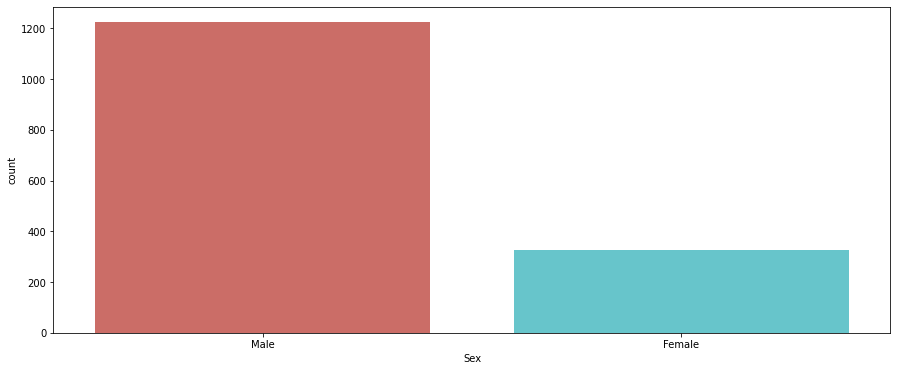

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('Sex',data=df,palette='hls')
plt.show()

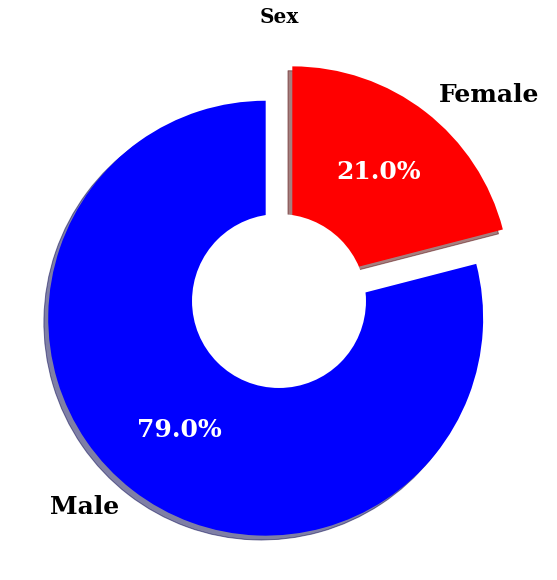

In [ ]:
label_data = df['Sex'].value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Sex', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [ ]:
df['SmokingStatus'].unique()

array(['Ex-smoker', 'Never smoked', 'Currently smokes'], dtype=object)

In [ ]:
df['SmokingStatus'].value_counts()

Ex-smoker           1038
Never smoked         429
Currently smokes      82
Name: SmokingStatus, dtype: int64

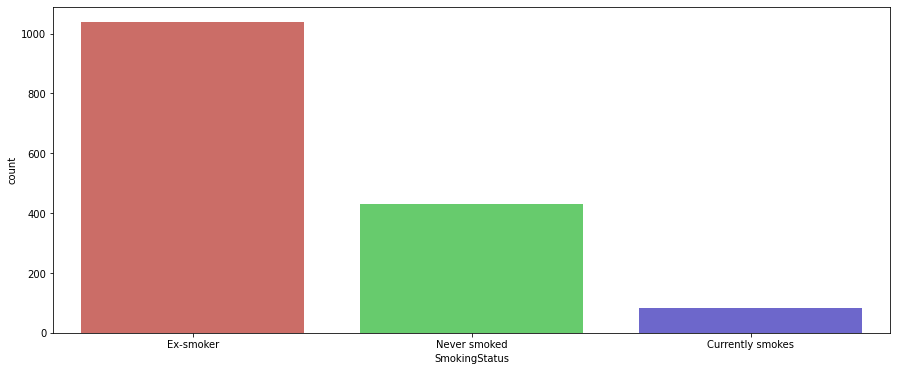

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('SmokingStatus',data=df,palette='hls')
plt.show()

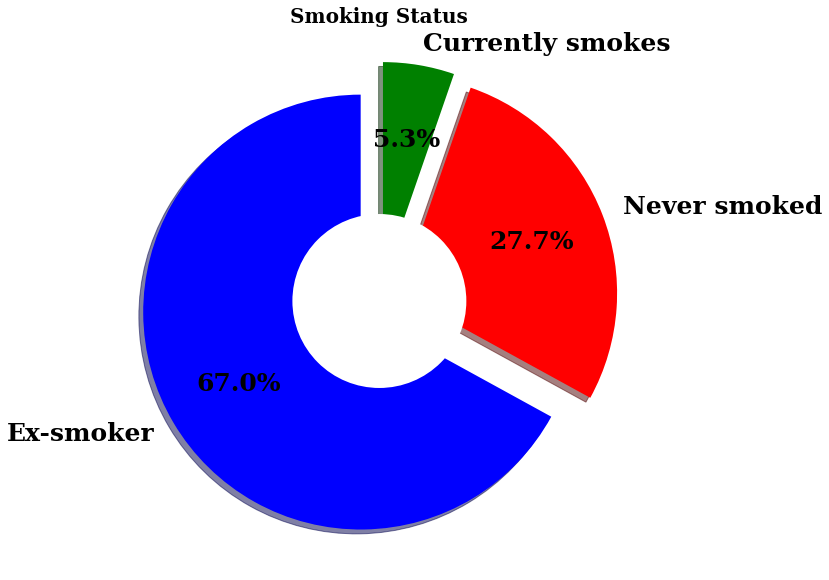

In [ ]:
label_data = df['SmokingStatus'].value_counts()

explode = (0.1, 0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red', 'green'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Smoking Status', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [ ]:
df

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker
...,...,...,...,...,...,...,...
1544,ID00426637202313170790466,13,2712,66.594637,73,Male,Never smoked
1545,ID00426637202313170790466,19,2978,73.126412,73,Male,Never smoked
1546,ID00426637202313170790466,31,2908,71.407524,73,Male,Never smoked
1547,ID00426637202313170790466,43,2975,73.052745,73,Male,Never smoked


In [ ]:
df = df.set_index('Patient')

In [ ]:
df

,Weeks,FVC,Percent,Age,Sex,SmokingStatus
Patient,,,,,,
ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker
...,...,...,...,...,...,...
ID00426637202313170790466,13,2712,66.594637,73,Male,Never smoked
ID00426637202313170790466,19,2978,73.126412,73,Male,Never smoked
ID00426637202313170790466,31,2908,71.407524,73,Male,Never smoked


In [ ]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['SmokingStatus'] = le.fit_transform(df['SmokingStatus'])

In [ ]:
df

,Weeks,FVC,Percent,Age,Sex,SmokingStatus
Patient,,,,,,
ID00007637202177411956430,-4,2315,58.253649,79,1,1
ID00007637202177411956430,5,2214,55.712129,79,1,1
ID00007637202177411956430,7,2061,51.862104,79,1,1
ID00007637202177411956430,9,2144,53.950679,79,1,1
ID00007637202177411956430,11,2069,52.063412,79,1,1
...,...,...,...,...,...,...
ID00426637202313170790466,13,2712,66.594637,73,1,2
ID00426637202313170790466,19,2978,73.126412,73,1,2
ID00426637202313170790466,31,2908,71.407524,73,1,2


In [ ]:
df['Weeks'].unique()

array([ -4,   5,   7,   9,  11,  17,  29,  41,  57,   8,  13,  15,  22,
        33,  45,  60,   0,   1,   3,  25,  37,  54,   6,  19,  32,  43,
        58,  35,  39,  47,  71,  87,   2,   4,  14,  26,  12,  21,  31,
        40,  52,  69,  16,  18,  20,  38,  53,  66,  23,  44,  70,  -3,
        27,  55,  49,  51,  81,  98,  30,  34,  36,  42,  65,  59,  24,
        63,  10,  61,  -1,  48,  56,  75,  28,  76,  46,  50,  83,  62,
        79,  -5,  73, 102,  82,  97, 100,  67,  91, 107,  85,  72,  84,
        78,  64,  68,  89, 101, 116,  -2,  74,  92, 104, 117, 133,  96,
        77,  94,  86,  88,  95,  93,  80,  99])

In [ ]:
df['Weeks'].value_counts()

 8      45
 12     44
 18     42
 10     41
 6      40
        ..
 104     1
 91      1
 107     1
-2       1
 99      1
Name: Weeks, Length: 112, dtype: int64

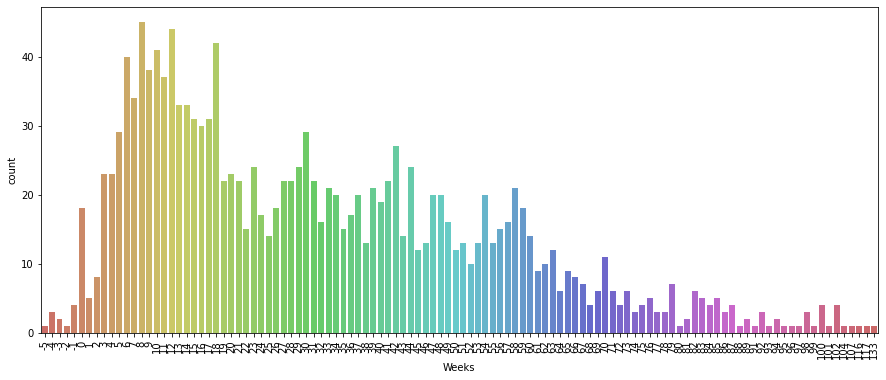

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('Weeks',  data=df, palette='hls')
plt.xticks(rotation=90)
plt.show()

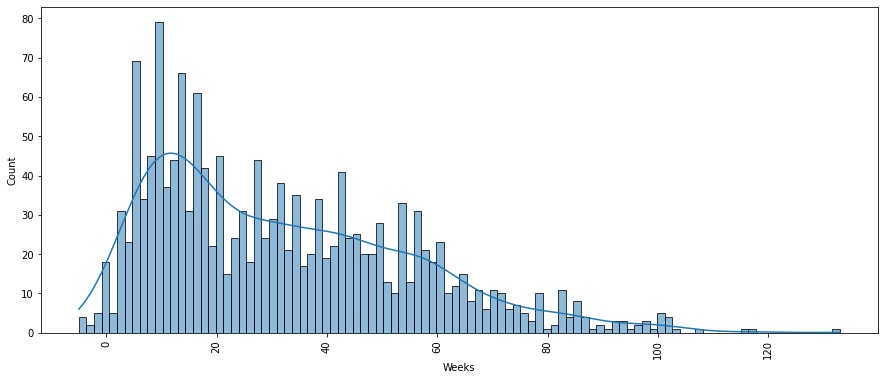

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df['Weeks'], bins = 100, kde=True, palette='hls')
plt.xticks(rotation=90)
plt.show()

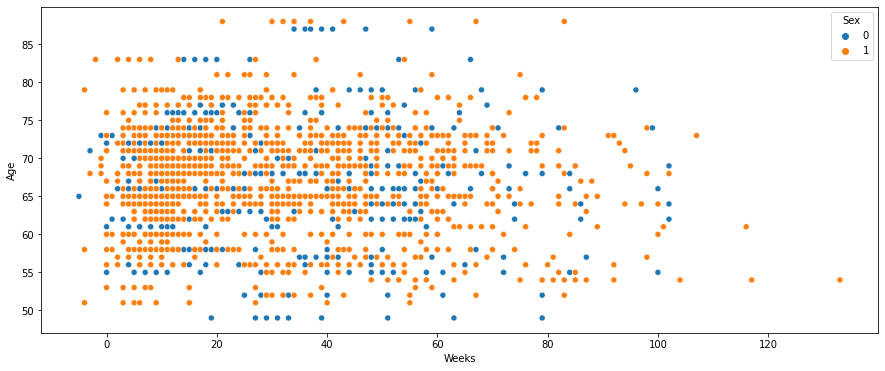

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x='Weeks', y='Age', hue='Sex')
plt.show()

In [ ]:
df['FVC'].unique()

array([2315, 2214, 2061, ..., 2712, 2978, 2774])

In [ ]:
df['FVC'].value_counts()

2474    4
2965    4
2889    4
2095    4
2708    4
       ..
3906    1
3780    1
3925    1
3907    1
2774    1
Name: FVC, Length: 1202, dtype: int64

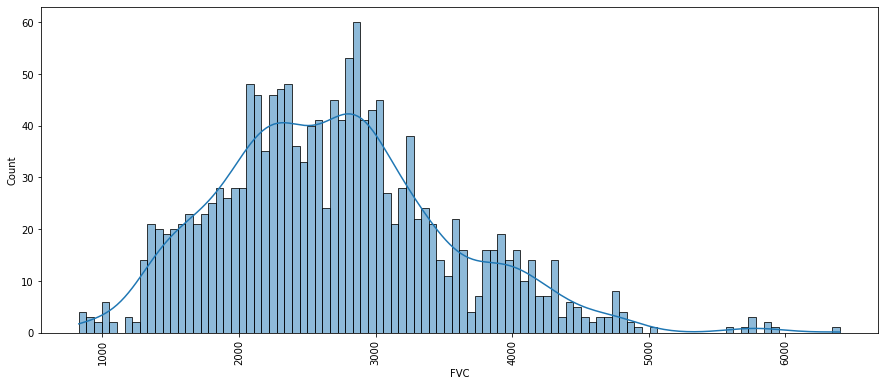

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df['FVC'], bins=100, kde=True, palette='hls')
plt.xticks(rotation=90)
plt.show()

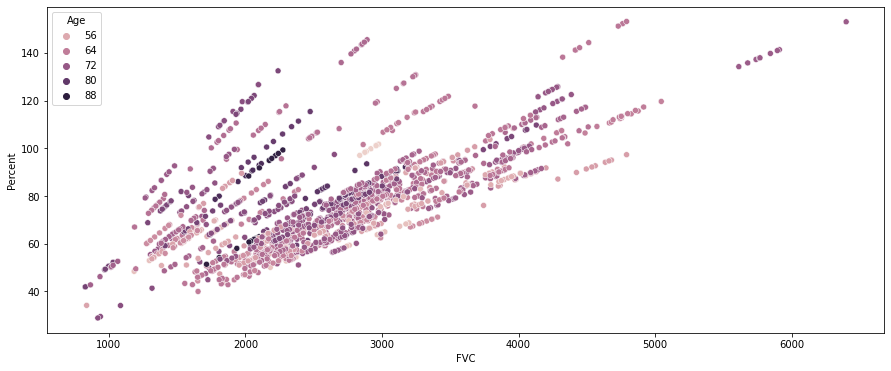

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x="FVC", y="Percent", hue="Age")
plt.show()

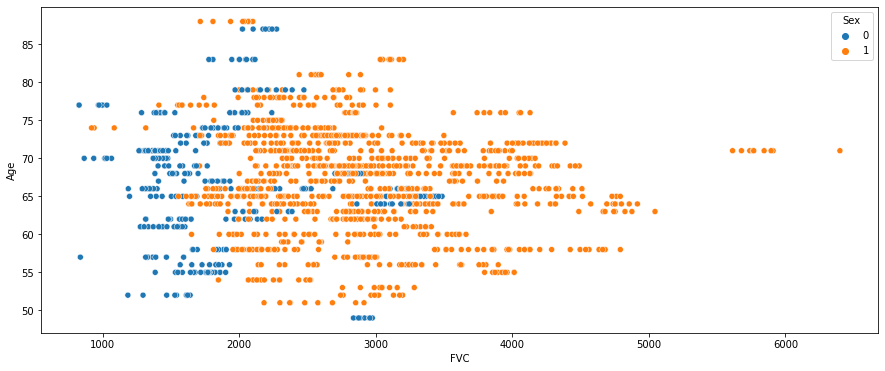

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x="FVC", y="Age", hue="Sex")
plt.show()

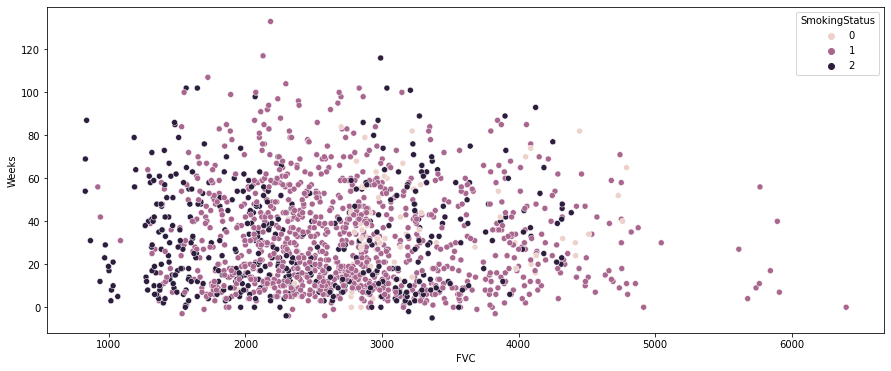

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x="FVC", y="Weeks", hue="SmokingStatus")
plt.show()

In [ ]:
df['Percent'].unique()

array([58.25364872, 55.71212884, 51.86210367, ..., 71.40752382,
       73.05274531, 68.11708084])

In [ ]:
df['Percent'].value_counts()

87.795153    2
83.282505    2
80.474296    2
57.897831    2
94.644367    2
            ..
69.492021    1
49.475076    1
55.840291    1
57.534926    1
68.117081    1
Name: Percent, Length: 1536, dtype: int64

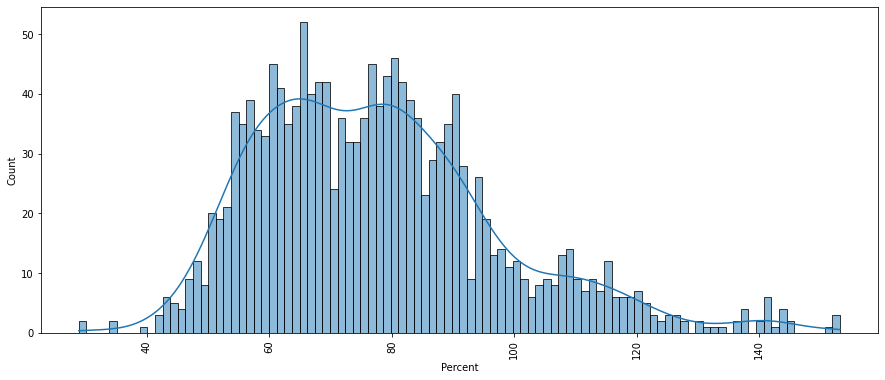

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df['Percent'], bins=100, kde=True, palette='hls')
plt.xticks(rotation=90)
plt.show()

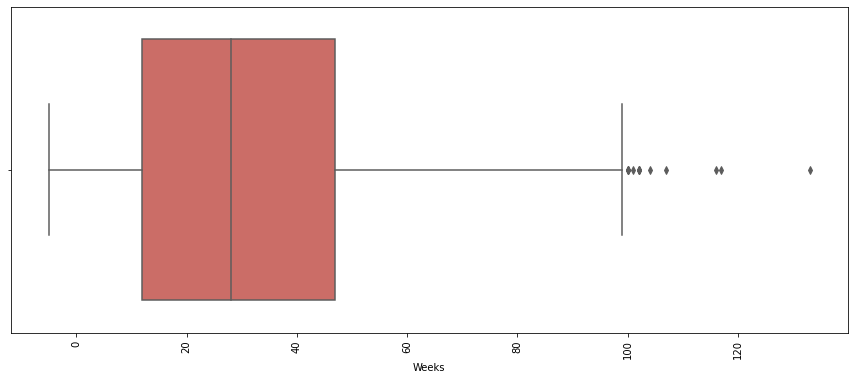

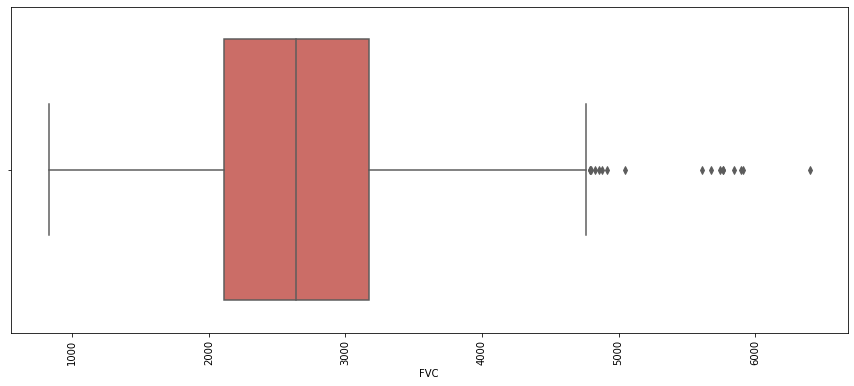

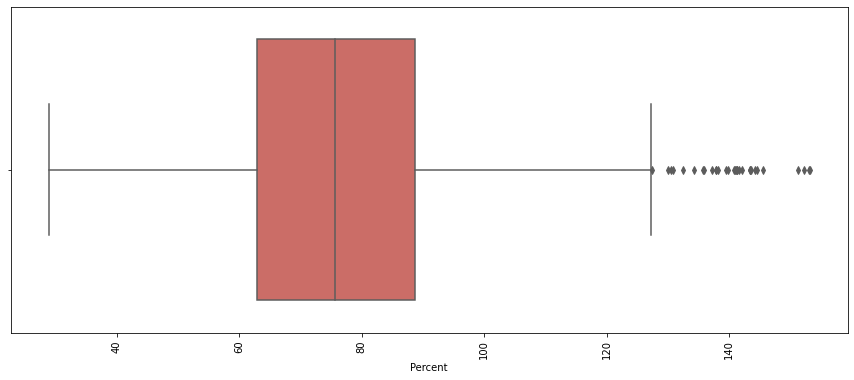

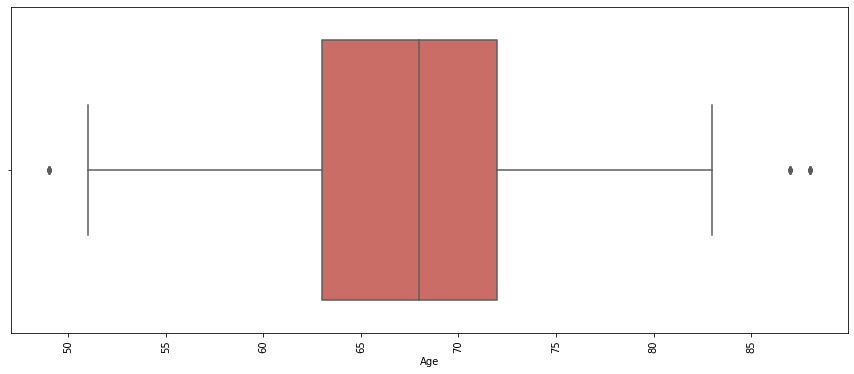

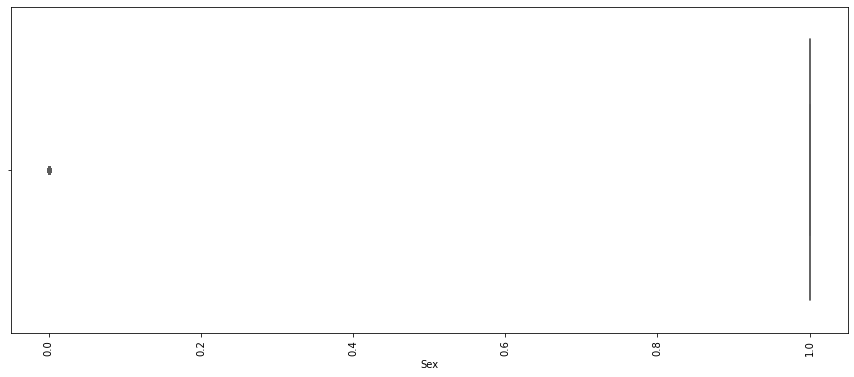

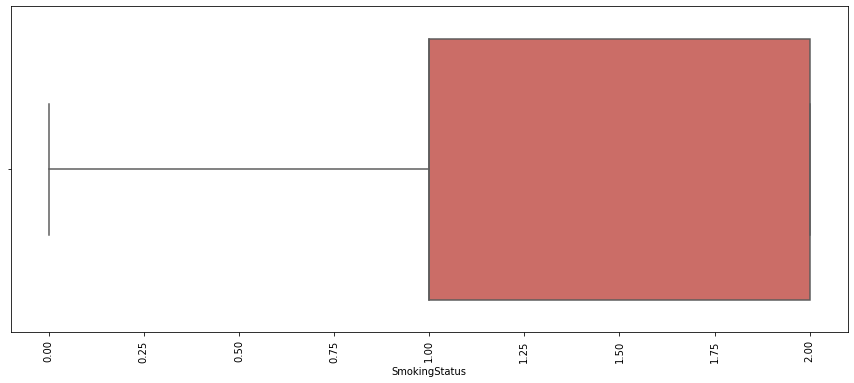

In [ ]:
for i in df.columns:
  plt.figure(figsize=(15,6))
  sns.boxplot(df[i], palette="hls")
  plt.xticks(rotation=90)
  plt.show()

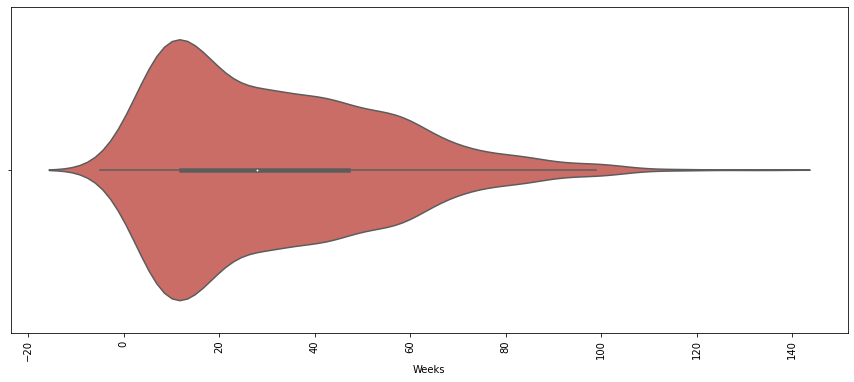

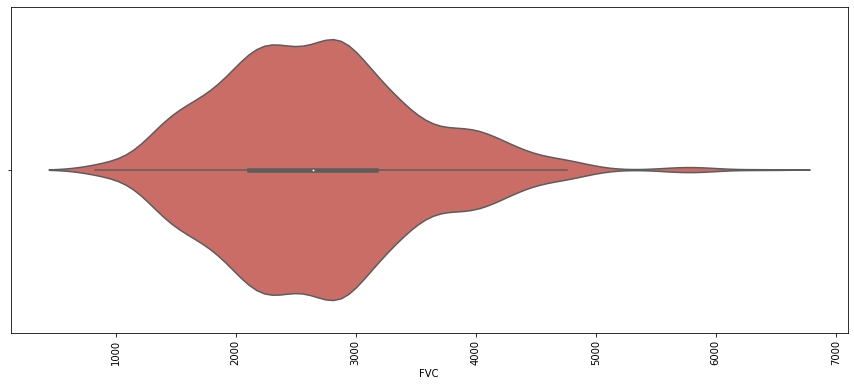

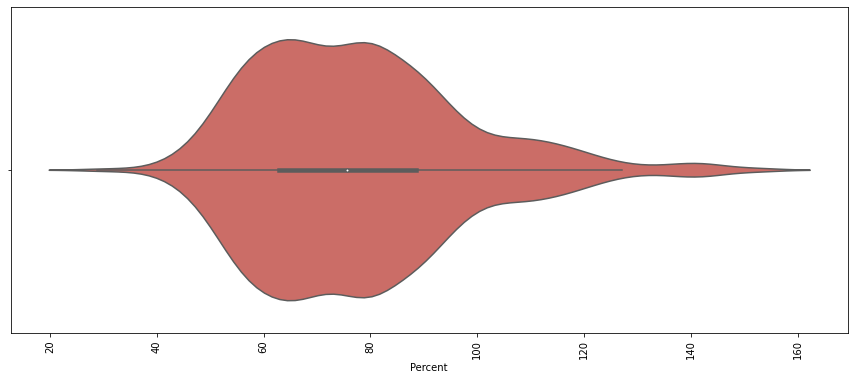

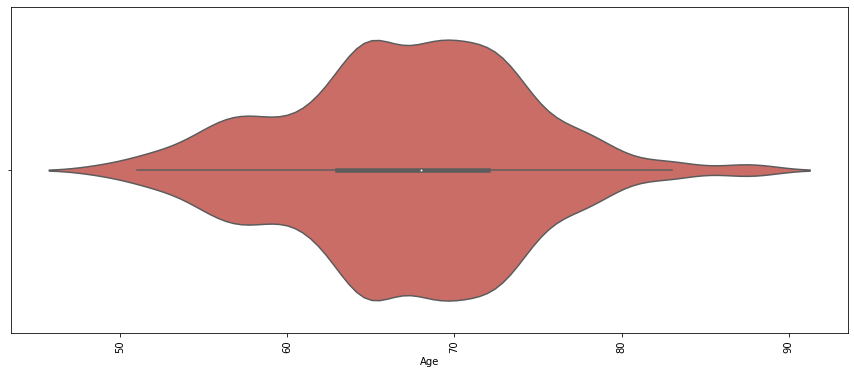

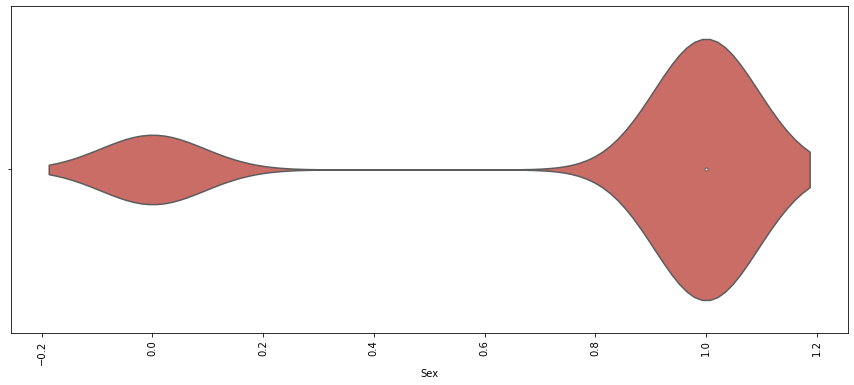

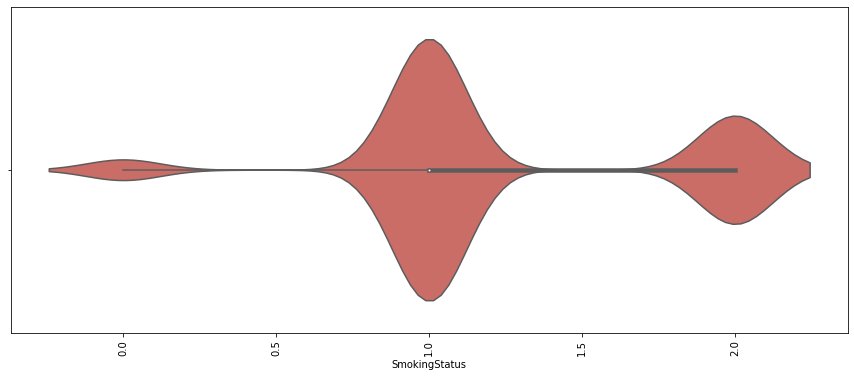

In [ ]:
for i in df.columns:
  plt.figure(figsize=(15,6))
  sns.violinplot(df[i], palette="hls")
  plt.xticks(rotation=90)
  plt.show()

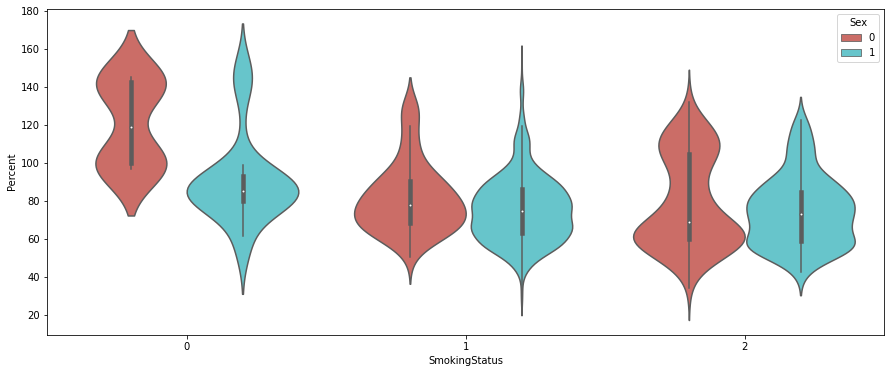

In [ ]:
plt.figure(figsize=(15,6))
sns.violinplot(data=df, x="SmokingStatus", y='Percent', hue='Sex', palette='hls')
plt.show()

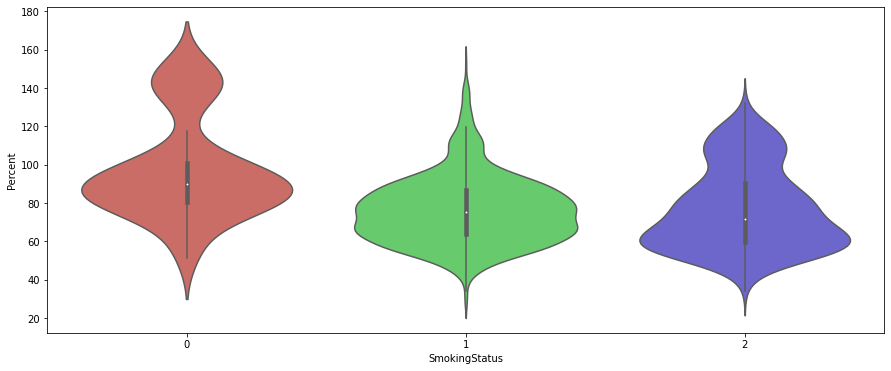

In [ ]:
plt.figure(figsize=(15,6))
sns.violinplot(data=df, x='SmokingStatus', y='Percent', palette='hls')
plt.show()

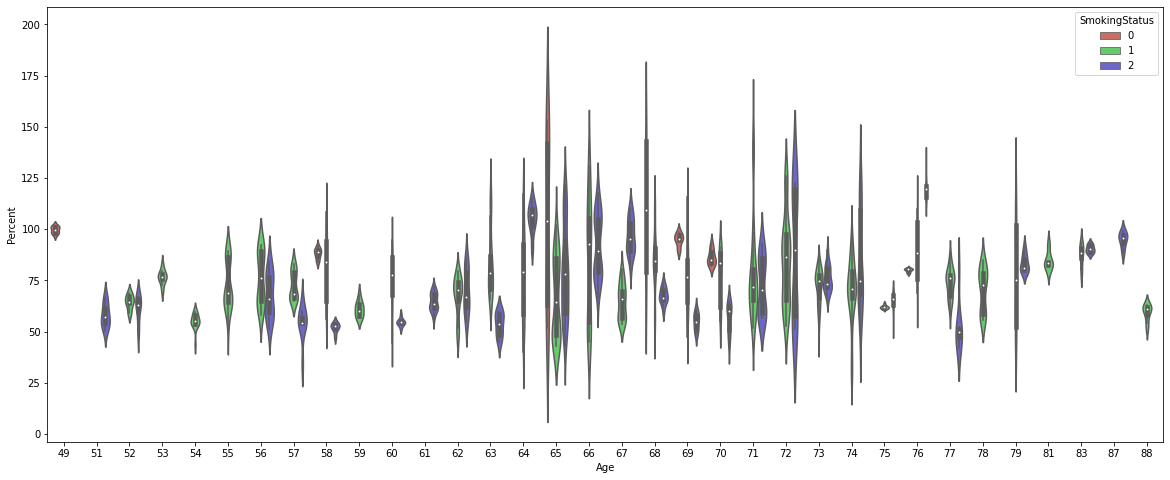

In [ ]:
plt.figure(figsize=(20,8))
sns.violinplot(data=df,x='Age', y='Percent', hue='SmokingStatus', palette='hls')
plt.show()

In [ ]:
df1['Patient'].unique()

array(['ID00007637202177411956430', 'ID00009637202177434476278',
       'ID00010637202177584971671', 'ID00011637202177653955184',
       'ID00012637202177665765362', 'ID00014637202177757139317',
       'ID00015637202177877247924', 'ID00019637202178323708467',
       'ID00020637202178344345685', 'ID00023637202179104603099',
       'ID00025637202179541264076', 'ID00026637202179561894768',
       'ID00027637202179689871102', 'ID00030637202181211009029',
       'ID00032637202181710233084', 'ID00035637202182204917484',
       'ID00038637202182690843176', 'ID00042637202184406822975',
       'ID00047637202184938901501', 'ID00048637202185016727717',
       'ID00051637202185848464638', 'ID00052637202186188008618',
       'ID00060637202187965290703', 'ID00061637202188184085559',
       'ID00062637202188654068490', 'ID00067637202189903532242',
       'ID00068637202190879923934', 'ID00072637202198161894406',
       'ID00073637202198167792918', 'ID00075637202198610425520',
       'ID000766372021990

In [ ]:
df1['Patient'].value_counts()

ID00105637202208831864134    10
ID00119637202215426335765    10
ID00229637202260254240583    10
ID00140637202231728595149    10
ID00388637202301028491611    10
                             ..
ID00052637202186188008618     7
ID00344637202287684217717     7
ID00186637202242472088675     7
ID00267637202270790561585     6
ID00047637202184938901501     6
Name: Patient, Length: 176, dtype: int64

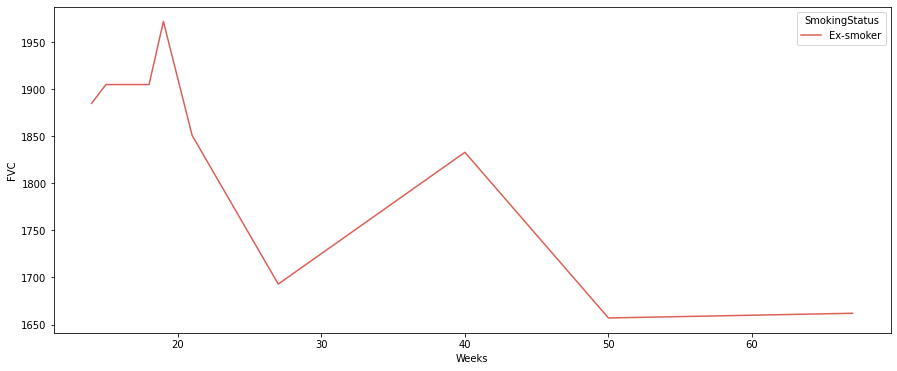

In [ ]:
patient1 = df1[df1.Patient == 'ID00228637202259965313869']
plt.figure(figsize=(15,6))
sns.lineplot(data=patient1, x='Weeks', y='FVC', hue='SmokingStatus', palette='hls')
plt.show()

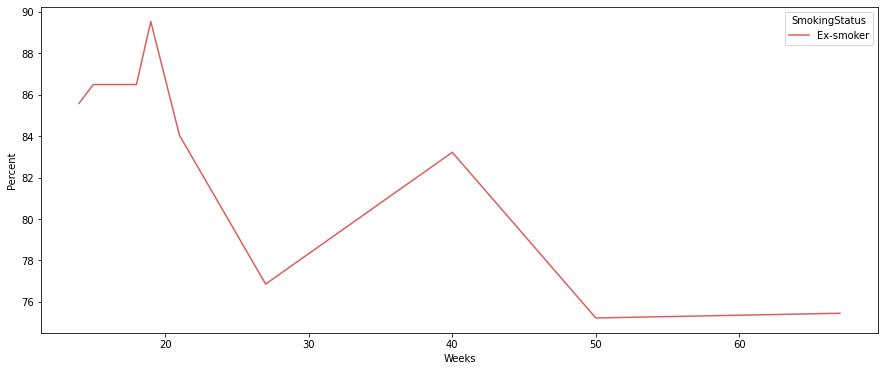

In [ ]:
patient1 = df1[df1.Patient == 'ID00228637202259965313869']
plt.figure(figsize=(15,6))
sns.lineplot(data=patient1, x='Weeks', y='Percent', hue='SmokingStatus', palette='hls')
plt.show()

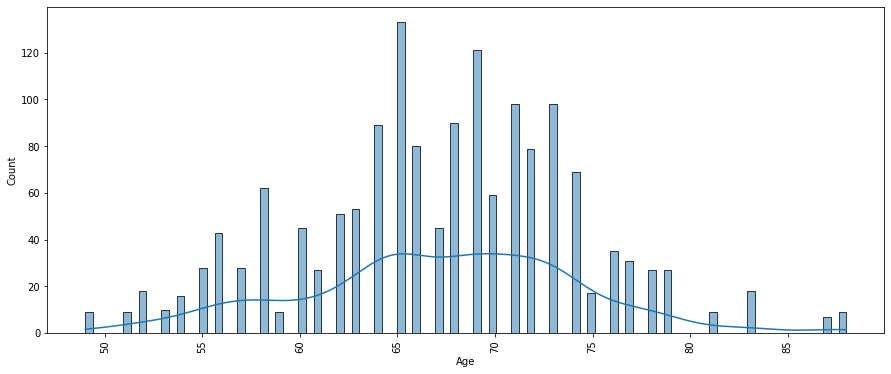

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df['Age'], bins=100, kde=True, palette='hls')
plt.xticks(rotation=90)
plt.show()

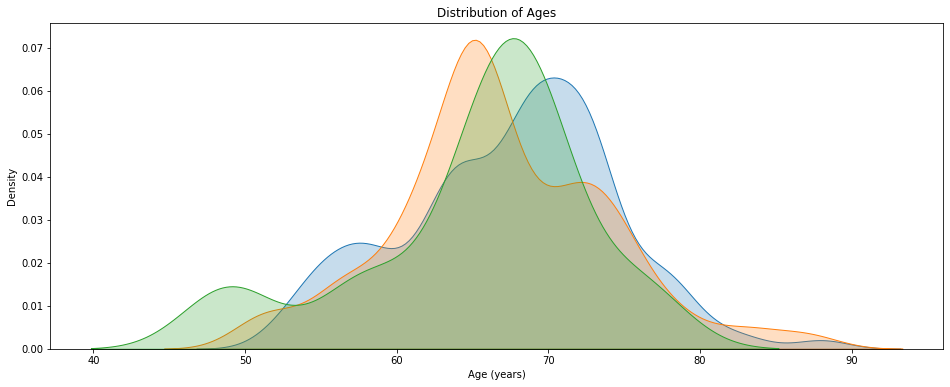

In [ ]:
plt.figure(figsize=(16, 6))
sns.kdeplot(df1.loc[df1['SmokingStatus'] == 'Ex-smoker', 'Age'], 
            label = 'Ex-smoker',shade=True)
sns.kdeplot(df1.loc[df1['SmokingStatus'] == 'Never smoked', 'Age'], 
            label = 'Never smoked',shade=True)
sns.kdeplot(df1.loc[df1['SmokingStatus'] == 'Currently smokes', 'Age'], 
            label = 'Currently smokes', shade=True)
plt.xlabel('Age (years)'); 
plt.ylabel('Density'); 
plt.title('Distribution of Ages');
plt.show()

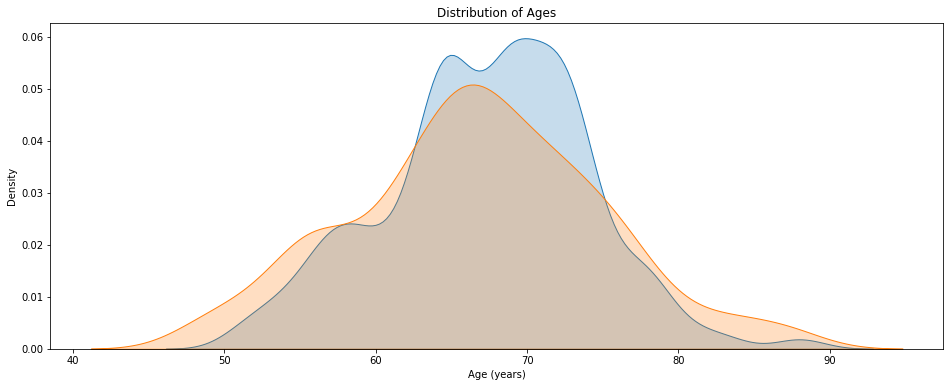

In [ ]:
plt.figure(figsize=(16, 6))
sns.kdeplot(df1.loc[df1['Sex'] == 'Male', 'Age'], label = 'Male',shade=True)
sns.kdeplot(df1.loc[df1['Sex'] == 'Female', 'Age'], label = 'Female',shade=True)
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.show()

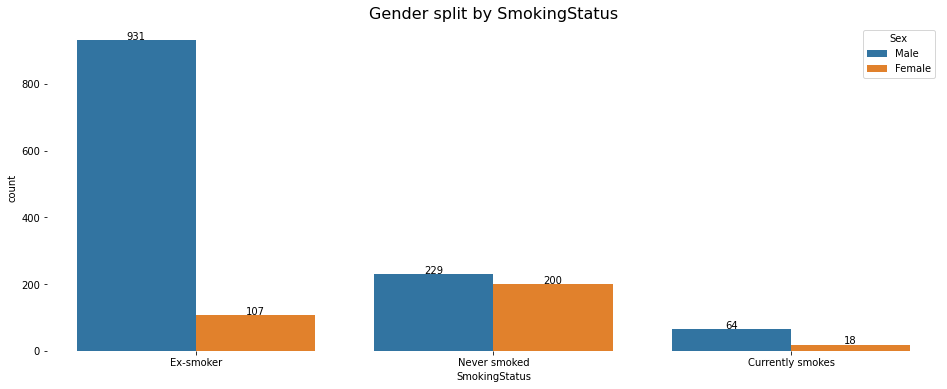

In [ ]:
plt.figure(figsize=(16, 6))
a = sns.countplot(data=df1, x='SmokingStatus', hue='Sex')
for p in a.patches:
    a.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')
plt.title('Gender split by SmokingStatus', fontsize=16)
sns.despine(left=True, bottom=True);

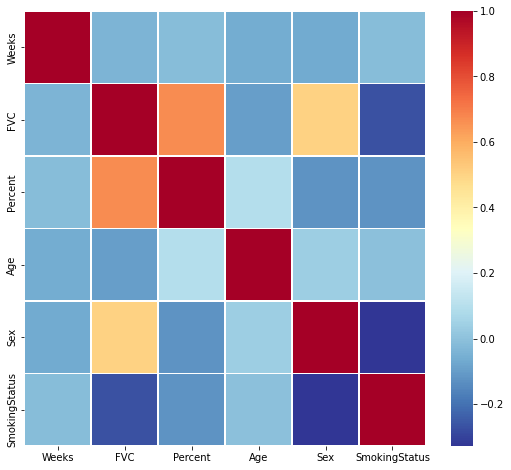

In [ ]:
corrmat = df.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap = 'RdYlBu_r', linewidths = 0.5) 
plt.show()